In [13]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
import re
import string
from sklearn.datasets import *

In [2]:
train=pd.read_csv('C:/Users/rajeshwari.pandilla/Downloads/CoronaDataset/Corona_NLP_train.csv',encoding='latin-1')
test=pd.read_csv('C:/Users/rajeshwari.pandilla/Downloads/CoronaDataset/Corona_NLP_test.csv',encoding='latin-1')

<AxesSubplot:>

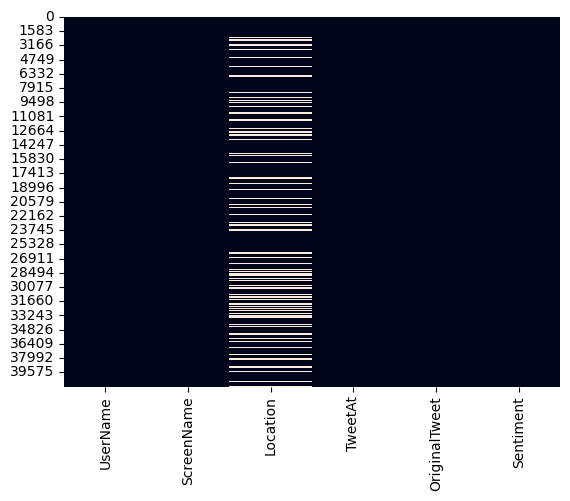

In [3]:
sns.heatmap(train.isnull(),cbar=False)

<AxesSubplot:>

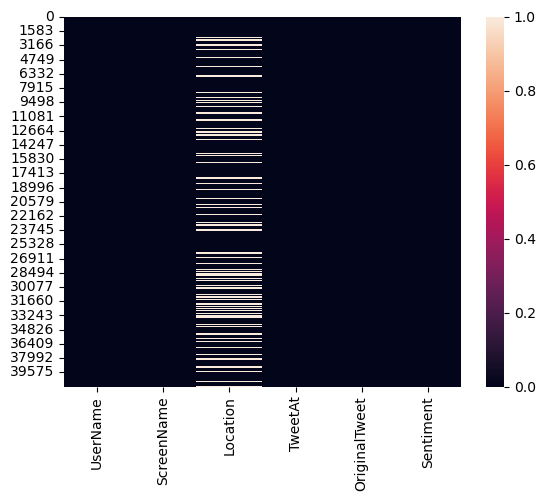

In [4]:
sns.heatmap(train.isnull(),cbar=True)


In [5]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


<AxesSubplot:>

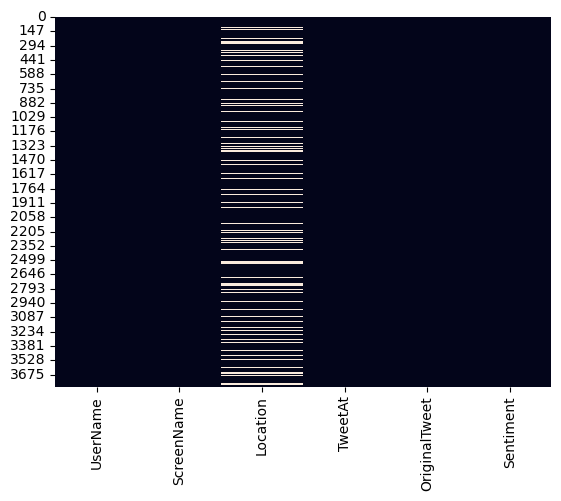

In [6]:
sns.heatmap(test.isnull(),cbar=False)

In [7]:
test.groupby('Sentiment').count()

,UserName,ScreenName,Location,TweetAt,OriginalTweet
Sentiment,,,,,
Extremely Negative,592,592,449,592,592
Extremely Positive,599,599,482,599,599
Negative,1041,1041,811,1041,1041
Neutral,619,619,497,619,619
Positive,947,947,725,947,947


In [8]:

# char_count
train['char_count'] = train['OriginalTweet'].apply(lambda x: len(str(x)))
# mention_count
train['mention_count'] = train['OriginalTweet'].apply(lambda x: len([c for c in str(x) if c == '@']))


In [ ]:
# char_count
test['char_count'] = test['OriginalTweet'].apply(lambda x: len(str(x)))
# mention_count
test['mention_count'] = test['OriginalTweet'].apply(lambda x: len([c for c in str(x) if c == '@']))
test

In [ ]:
new = train["TweetAt"].str.split("-", n = 2, expand = True)
train['year']=new[2].astype(int)
train['month']=new[1].astype(int)
train['day']=new[0].astype(int)
train

In [ ]:
new = test["TweetAt"].str.split("-", n = 2, expand = True)
test['year']=new[2].astype(int)
test['month']=new[1].astype(int)
test['day']=new[0].astype(int)
test

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

test['OriginalTweet'] = test['OriginalTweet'].apply(lambda text: cleaning_stopwords(text))

train['OriginalTweet'] = train['OriginalTweet'].apply(lambda text: cleaning_stopwords(text))


In [ ]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)
train['OriginalTweet']= train['OriginalTweet'].apply(lambda x: cleaning_URLs(x))

test['OriginalTweet']= test['OriginalTweet'].apply(lambda x: cleaning_URLs(x))


In [ ]:

english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
train['OriginalTweet']= train['OriginalTweet'].apply(lambda x: cleaning_punctuations(x))

test['OriginalTweet']= test['OriginalTweet'].apply(lambda x: cleaning_punctuations(x))


In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+','', data)
train['OriginalTweet']= train['OriginalTweet'].apply(lambda x: cleaning_numbers(x))

test['OriginalTweet']= test['OriginalTweet'].apply(lambda x: cleaning_numbers(x))


In [ ]:
train

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
train['OriginalTweet'] = train['OriginalTweet'].apply(tokenizer.tokenize)

test['OriginalTweet'] = test['OriginalTweet'].apply(tokenizer.tokenize)


In [ ]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    data = [st.stem(word) for word in data]
    return data
train['OriginalTweet']= train['OriginalTweet'].apply(lambda x: stemming_on_text(x))

test['OriginalTweet']= test['OriginalTweet'].apply(lambda x: stemming_on_text(x))


lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(txt):
    txt = [lm.lemmatize(word) for word in txt]
    return txt

train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x: lemmatizer_on_text(x))
train

In [ ]:
train['Sentiment']=train['Sentiment'].replace('Extremely Positive','Positive')
train['Sentiment']=train['Sentiment'].replace('Extremely Negative','Negative')

test['Sentiment']=test['Sentiment'].replace('Extremely Positive','Positive')
test['Sentiment']=test['Sentiment'].replace('Extremely Negative','Negative')

In [ ]:
train1=train
train1.Sentiment=train1.Sentiment.replace('Neutral',1)
train1.Sentiment=train1.Sentiment.replace('Positive',2)
train1.Sentiment=train1.Sentiment.replace('Negative',0)


In [ ]:
train=train.drop(columns=['ScreenName','Location','TweetAt','year'])
test=test.drop(columns=['ScreenName','Location','TweetAt','year'])


In [ ]:
Y_train=train['Sentiment']
Y_test=test['Sentiment']
X_train=train.drop("Sentiment",axis=1)
X_test=test.drop("Sentiment",axis=1)

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU,SimpleRNN
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [ ]:
Y_train

In [ ]:
X=X_train.OriginalTweet
Y=Y_train

In [ ]:

max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
word_index = tok.word_index
sequences_matrix

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y)
Y=le.transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, Y, test_size=0.3, random_state=2)

In [ ]:
# A simpleRNN without any pretrained embeddings and one dense layer
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     200,
                     input_length=max_len))
model.add(SimpleRNN(200))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss =SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
    
model.summary()

In [ ]:
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
def roc_auc(predictions,target):
    '''
    This methods returns the AUC Score when given the Predictions
    and Labels
    '''
    
    fpr, tpr, thresholds = metrics.roc_curve(target, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    return roc_auc

In [ ]:
model.fit(X_train, Y_train, epochs=10) 

In [ ]:
Y_test

In [ ]:
scores = model.predict(X_test)


In [ ]:
scores

In [ ]:
score=[]
for s in scores:
    score+=[int(np.where(s == s.max())[0])]
score

In [ ]:
from sklearn import metrics

acc=metrics.accuracy_score(score,Y_test)
acc

In [ ]:
len(score)